# MNIST data set
MNIST is publicly available image data set which consists of 28 by 28 pixels image of hand-written single digits. So each image in MNIST is an image of a digit from 0 to 9. MNIST challenge is to develop a machine learning algorithm that can classify these images into 10 classes (0 to 9).

### Preparation?
You can run this notebook on [google colaboratory](https://colab.research.google.com) and you do not need to run on your own machine (you certainly can use your machine if you prefer!). 

In this notebook, we get ourselves familiar with MNIST data set and tensorflow's handy API to access MNIST.

In [1]:
# Import tensorflow
import tensorflow as tf
# Import tensorflow's MNIST data handle
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

I hope you don't hate me that above commands downloaded MNIST data set to your loacl disk space :)
Below you see how to fetch arbitrary number of MNIST image data and their _labels_, a correct digit in each image.

In [0]:
#randomly gets 100 images to train svm
image_count = 100
data = mnist.train.next_batch(image_count)

The fetched data is a python list of 2 elemnts: data and label. Let's loop over them and visualize.

In [3]:
images = data[0]
labels = data[1]

# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

''' shows all digit images and their label
for index, image in enumerate(images):
    print 'Label:', labels[index]
    print 'Digit in the image', np.argmax(labels[index])
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()
'''

" shows all digit images and their label\nfor index, image in enumerate(images):\n    print 'Label:', labels[index]\n    print 'Digit in the image', np.argmax(labels[index])\n    plt.imshow(image.reshape(28,28),cmap='gray')\n    plt.show()\n"

/usr/local/lib/python2.7/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


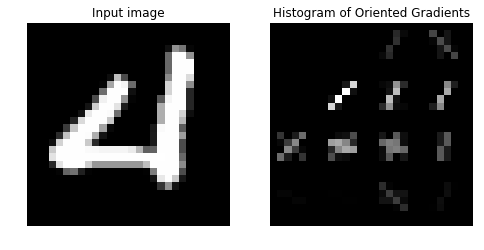

In [4]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

#turn images into images with hog features

fd, hog_image = hog(images[1].reshape(28,28), orientations=8, pixels_per_cell=(7, 7),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(images[1].reshape(28,28), cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 255))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

/usr/local/lib/python2.7/dist-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


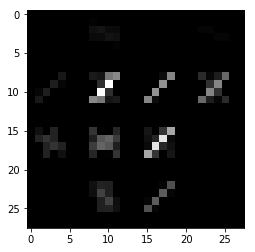

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


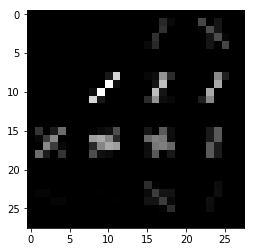

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


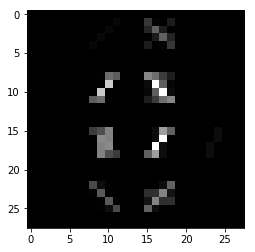

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


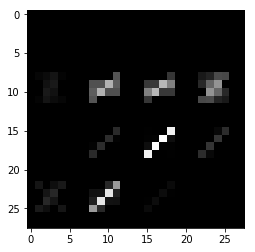

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


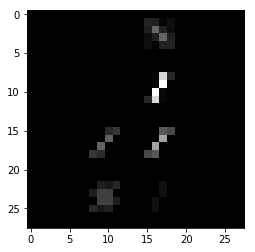

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


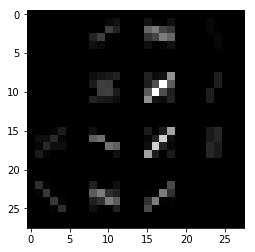

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


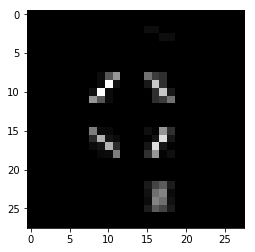

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


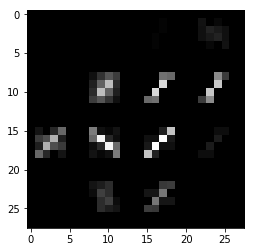

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


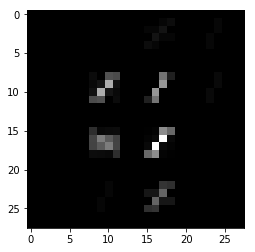

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


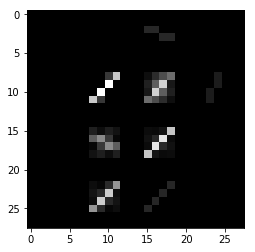

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


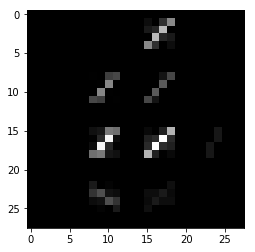

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


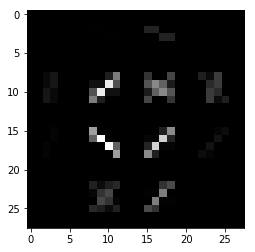

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


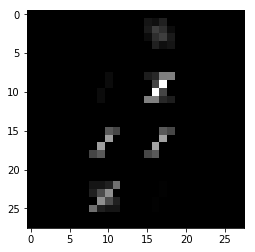

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


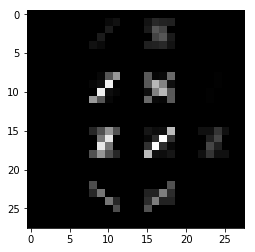

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


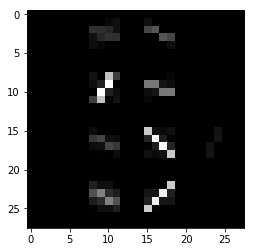

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


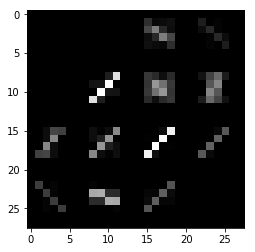

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


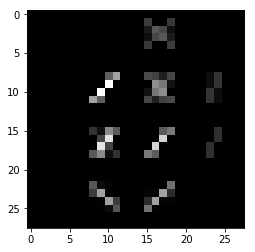

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


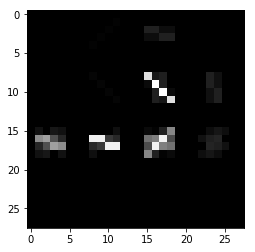

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


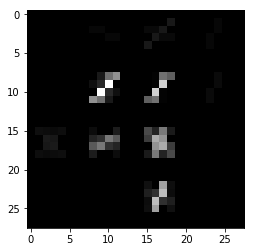

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


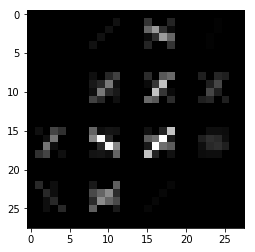

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


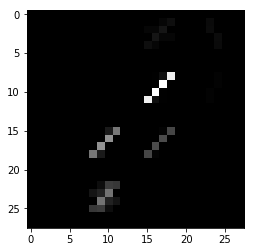

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


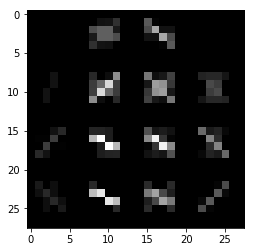

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


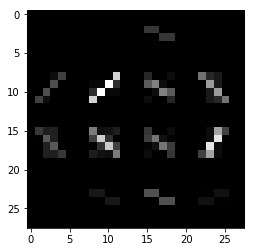

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


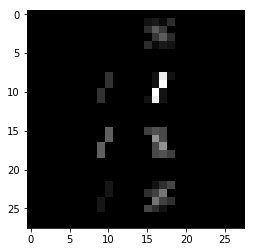

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


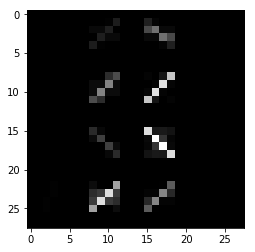

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


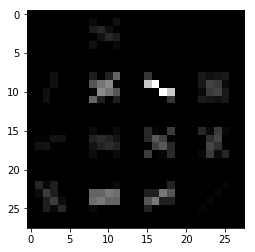

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


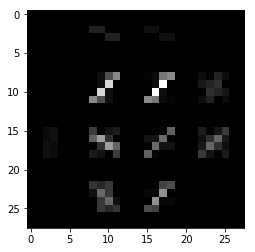

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


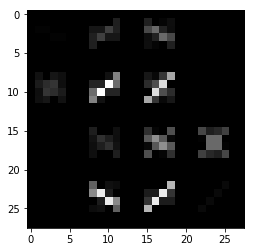

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


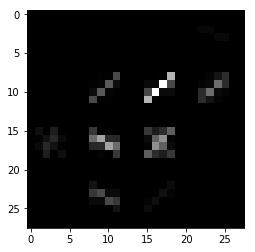

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


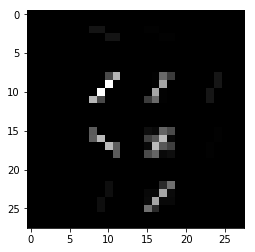

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


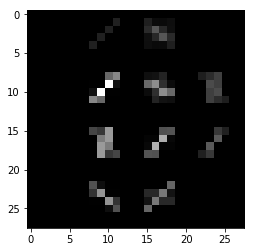

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


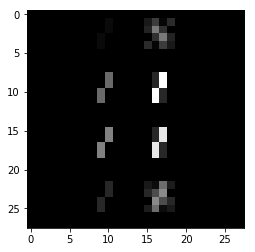

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


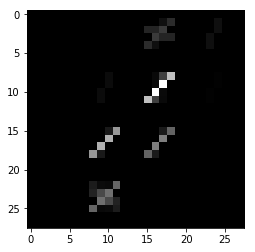

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


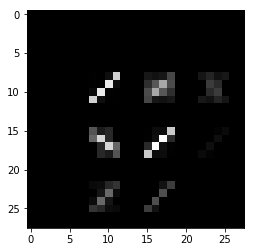

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


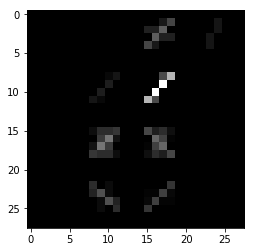

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


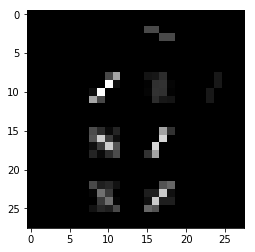

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


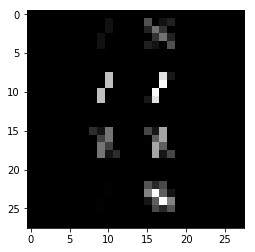

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


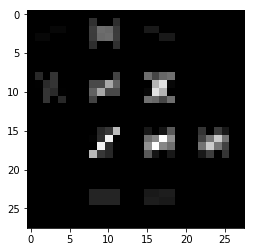

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


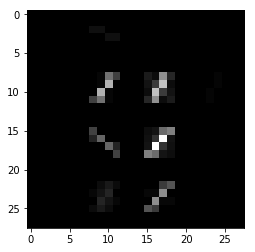

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


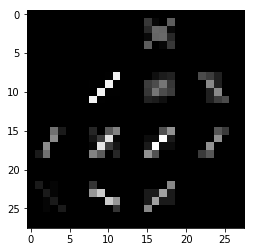

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


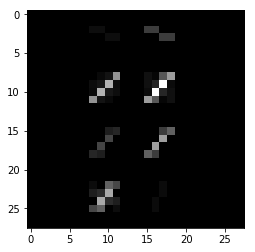

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


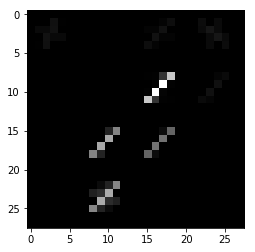

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


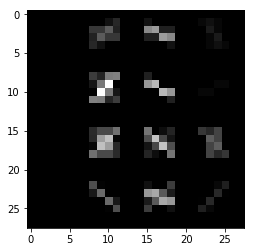

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


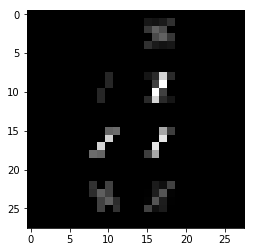

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


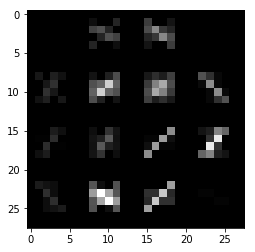

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


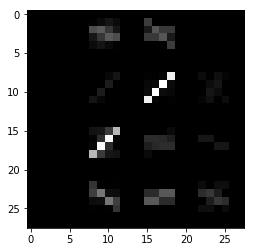

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


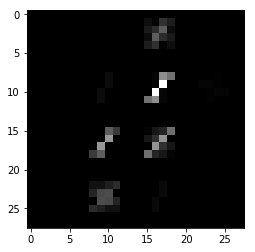

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


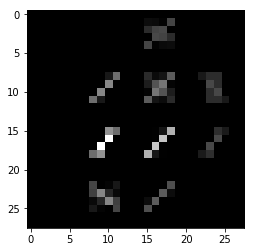

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


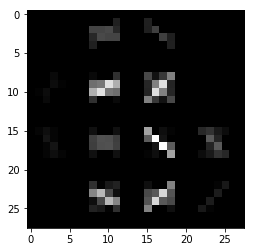

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


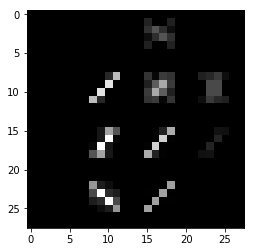

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


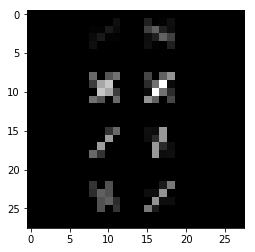

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


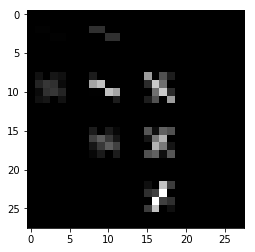

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


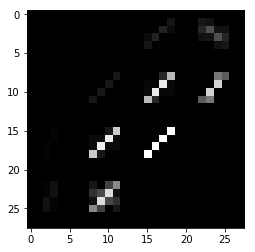

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


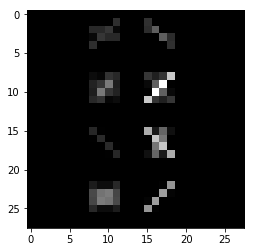

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


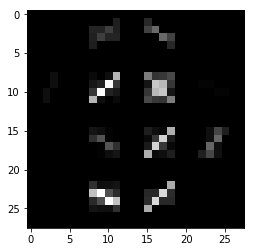

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


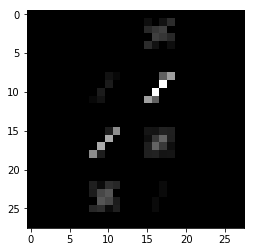

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


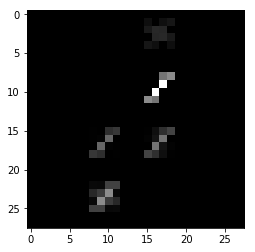

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


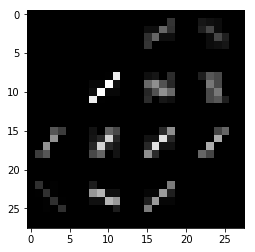

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


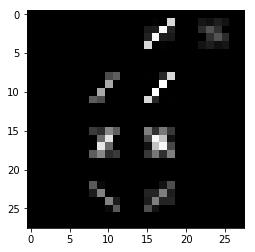

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


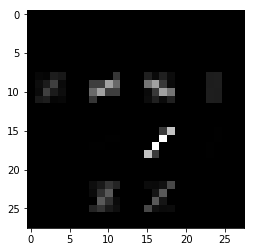

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


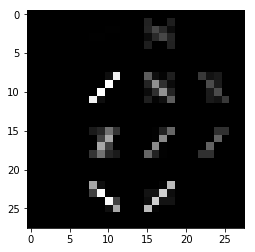

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


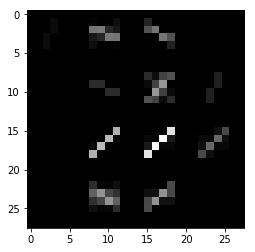

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


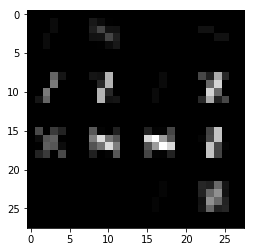

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


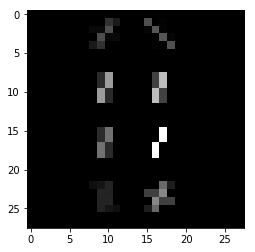

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


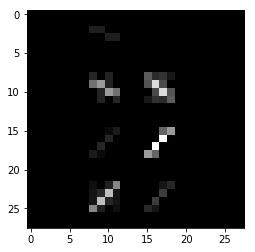

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


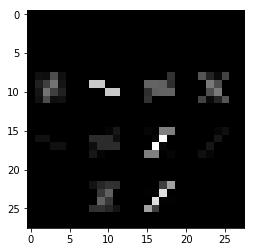

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


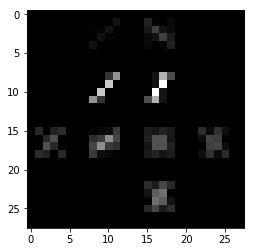

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


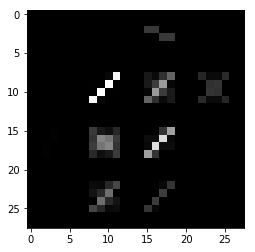

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


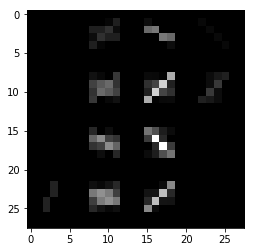

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


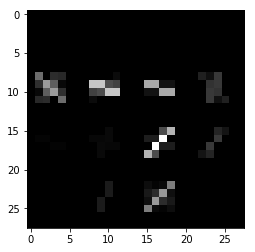

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


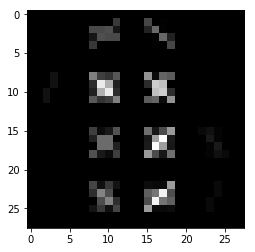

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


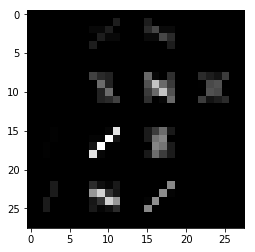

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


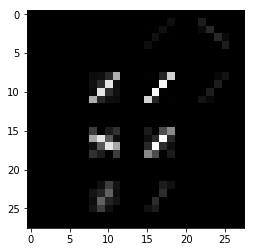

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


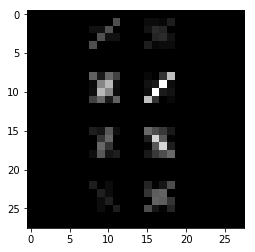

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


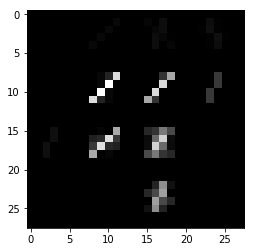

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


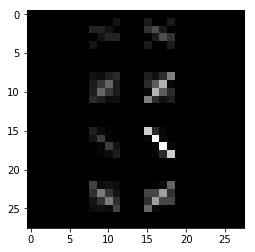

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


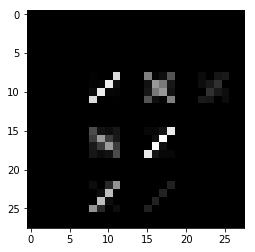

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


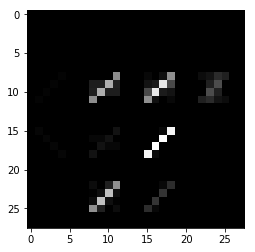

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


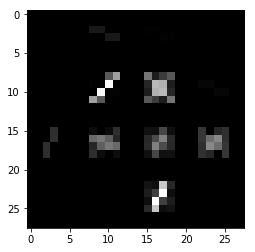

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


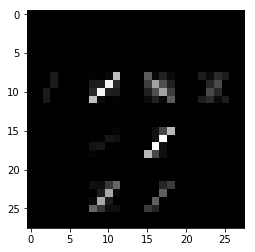

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


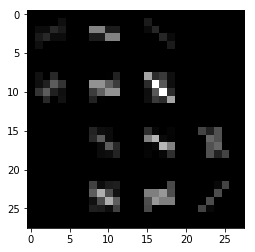

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


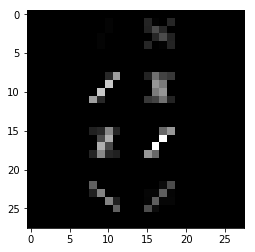

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


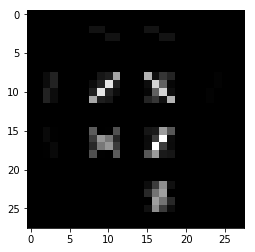

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


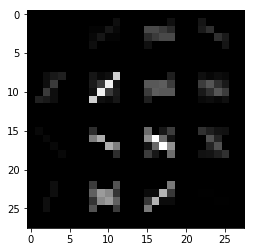

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


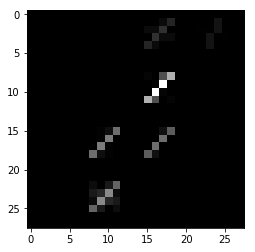

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


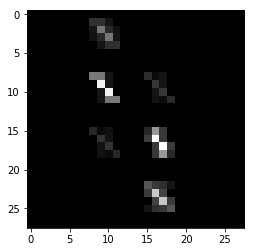

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


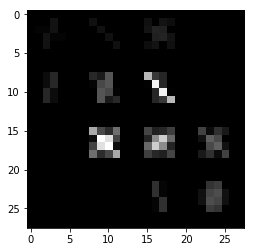

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


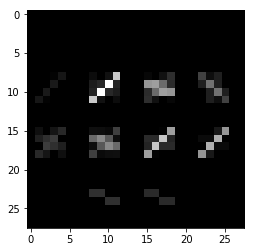

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


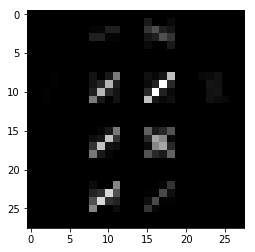

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


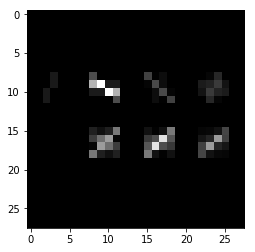

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


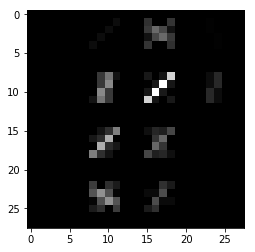

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


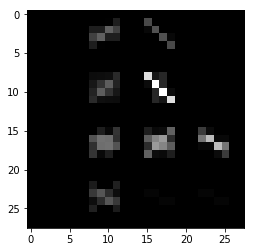

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


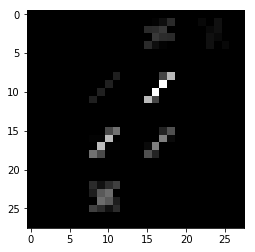

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


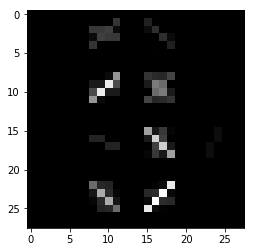

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


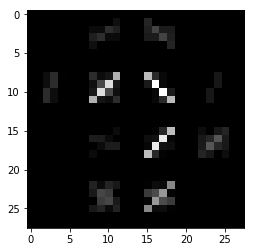

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


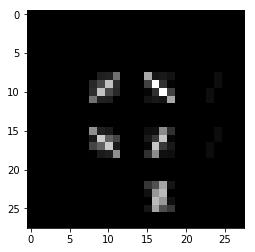

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


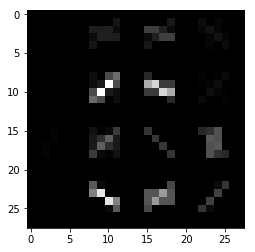

Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Digit in the image 9


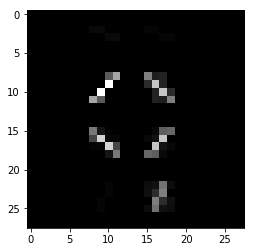

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


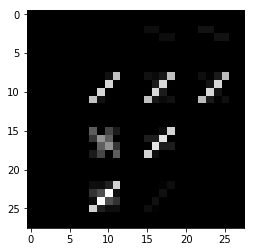

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 2


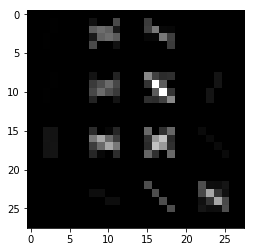

In [5]:
hog_images = []
hog_features = []
for i in range(image_count):
    fd,hog_image = hog(images[i].reshape(28,28), orientations=8, pixels_per_cell=(7,7),cells_per_block=(1, 1),block_norm= 'L2',visualise=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
    
    # print the new images
for index, image in enumerate(hog_images):
    print 'Label:', labels[index]
    print 'Digit in the image', np.argmax(labels[index])
    plt.imshow(image,cmap='gray')
    plt.show()

In [6]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,labels))
np.random.shuffle(data_frame)

# user extracted hog features to train a SVM

#What percentage of data you want to keep for training
percentage = 80
partition = int(len(hog_features)*percentage/100)


x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

# get accuracy from training

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.95


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       0.00      0.00      0.00         1

   micro avg       0.95      0.95      0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In this notebook we covered a very simple content: MNIST data set and how to use tensorflow API to fetch them. Hope this was helpful to focus on the algorithm part in the next notebook where we train a neural network for MNIST digit classification.